# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')

# Data Cleaning

In [3]:
#From old notebook EDA, the null values are from years after 2016.
#Dropping na will delete all entries after 2016.
df = df.dropna()

# EDA

## Genres

### Genre Counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

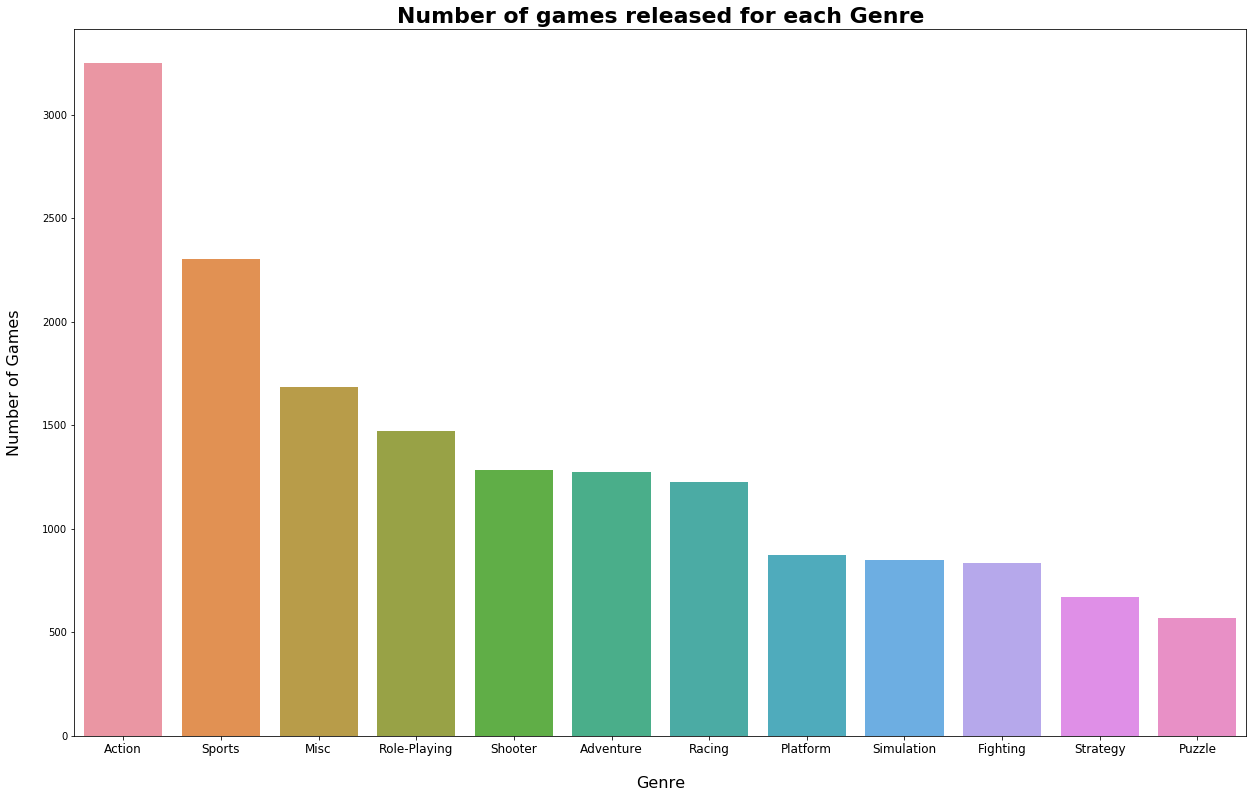

In [4]:
plt.figure(figsize=(21,13))
sns.barplot(x=df.Genre.value_counts().index, y=df.Genre.value_counts(), data=df)
plt.title("Number of games released for each Genre", fontweight='bold',fontsize=22)
plt.ylabel("Number of Games", fontsize=16, labelpad=20)
plt.xlabel("Genre", fontsize=16, labelpad=20)
plt.xticks(fontsize=12)

### Global Sales by Genre

In [5]:
#Define df with only columns of interest
gsales_genre_df = df[['Genre', 'Global_Sales']]
#Groupby Platform, Aggregate the Global Sales
gsales_genre = gsales_genre_df.groupby('Genre').agg({'Global_Sales':'sum'}).reset_index()
#Groupby to order category for graph
genre_order = gsales_genre.groupby(["Genre"])['Global_Sales'].aggregate(np.mean).reset_index().sort_values('Global_Sales',
                                                                                                        ascending=False)

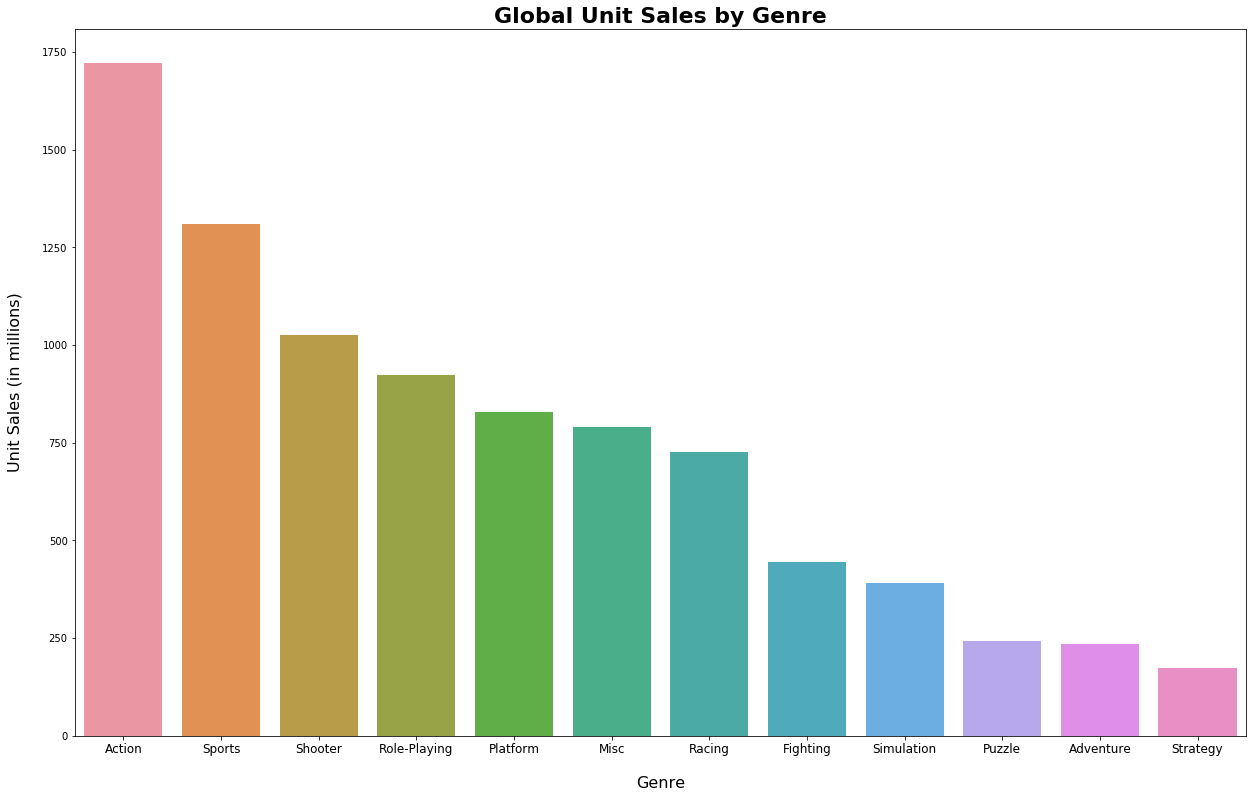

In [6]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="Global_Sales", data=gsales_genre, order=genre_order['Genre'])
plt.title('Global Unit Sales by Genre', fontweight='bold',fontsize=22)
plt.xlabel('Genre',fontsize=16, labelpad=20)
plt.ylabel('Unit Sales (in millions)',fontsize=16, labelpad=20)
plt.xticks(fontsize=12)
plt.show()

### Average Sales per Game

In [7]:
sales_per_game = genre_order.copy()

In [8]:
sales_per_game['Value_Counts'] = df.Genre.value_counts()

In [9]:
sales_per_game['Value_Counts'] = [3251, 2304, 1282, 1470, 875, 1686, 1225, 836, 848, 570, 1274, 670]

In [14]:
sales_per_game['sale_per_game'] = sales_per_game['Global_Sales']/sales_per_game['Value_Counts']

In [15]:
sales_per_game

,Genre,Global_Sales,Value_Counts,sale_per_game
0,Action,1722.84,3251,0.529942
10,Sports,1309.24,2304,0.568247
8,Shooter,1026.20,1282,0.800468
7,Role-Playing,923.83,1470,0.628456
4,Platform,829.13,875,0.947577
3,Misc,789.87,1686,0.468488
6,Racing,726.76,1225,0.593273
2,Fighting,444.05,836,0.531160
9,Simulation,389.98,848,0.459882
5,Puzzle,242.21,570,0.424930


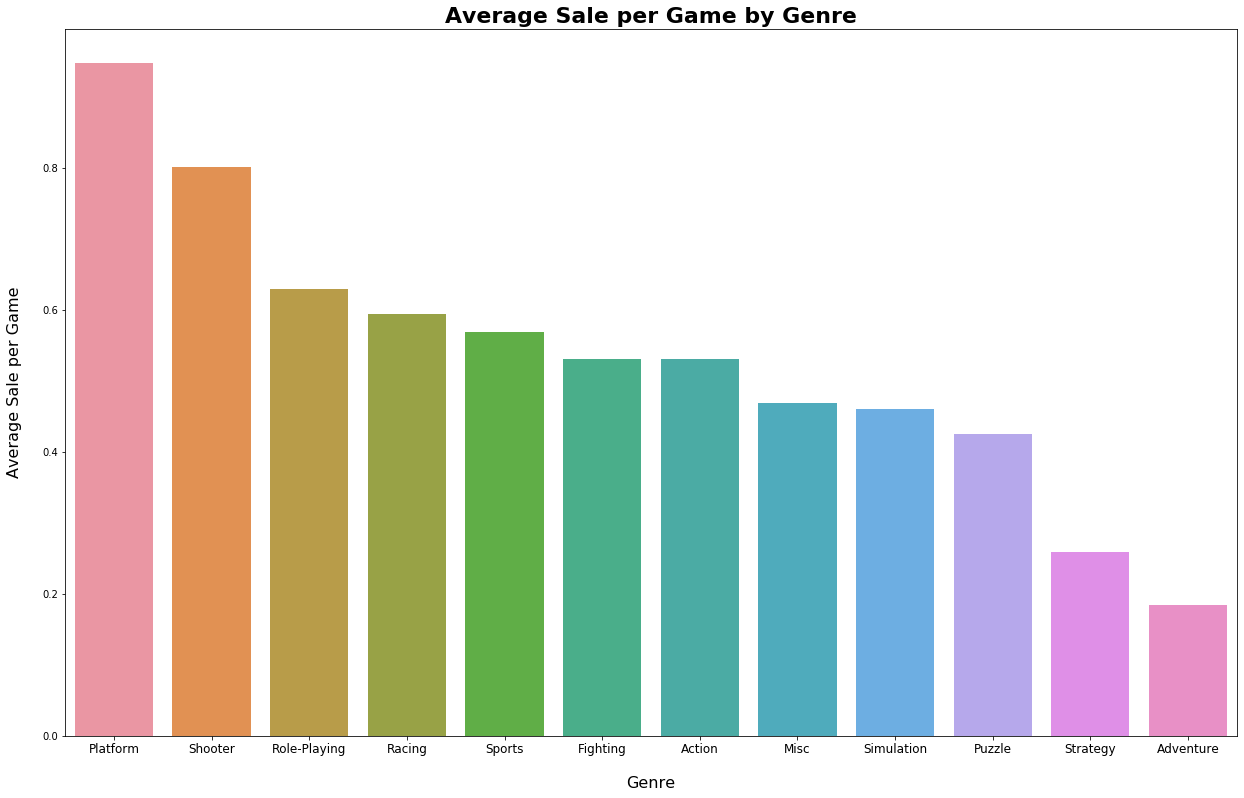

In [16]:
plt.figure(figsize=(21,13))
sns.barplot(x="Genre", y="sale_per_game", data=sales_per_game, order=sales_per_game.sort_values('sale_per_game', ascending=False).Genre)
plt.title('Average Sale per Game by Genre', fontweight='bold',fontsize=22)
plt.xlabel('Genre',fontsize=16, labelpad=20)
plt.ylabel('Average Sale per Game',fontsize=16, labelpad=20)
plt.xticks(fontsize=12)
plt.show()

### Regional Sales by Genre

### Genres by Year

### Game Title Analysis
